# Math 351 Assignment 2


# Problem 1

Consider the approximation

$$\frac{d}{dx} \tan(x) \approx \frac{\tan(x+h) - \tan(x)}{h},$$

where $h=2^{-n}$, $n$ is a fixed positive integer, and we're doing the computation using floating point arithmetic.  

(a) I claim that if $n$ is too large, or too small, this approximation works badly - why?

(b) Find the range of $n$ such that the error in this approximation is at most $10^{-5}$ over the range $|x| \leq \frac{\pi}{4}$.

# A.)
When n is very large, h converges to 0. This means that tan(x+h) is roughly equivalent to tan(x). Subtracting two numbers that are very close in value causes a large loss of significance due to rounding and significant figures.  
When n is very small, h converges to 2. The periodicity of tan(x) is only $\pi$, meaning that adding 2 to x drastically changes the value of tan(x). Essentially, we've moved too far away from x for our approximation to be accurate.

# B.)  
See code below for the algorithm used.  
The error was consistently below $10^{-5}$ for all $|x| \leq \pi/4$ once I hit values of $n \geq 16$. When increasing the value of n to $n \geq 33$, however, I found that there was enough loss of significance that the computer began attempting to divide by zero, resulting in a runtime error.  
Thus, the final range of n that keeps Error $\leq 10^{-5}$ is $16 \leq n \leq 33$.

In [121]:
import numpy as np
x = np.arange(-np.pi/4, np.pi/4, np.pi/200)
for k in range(0, 32):
    h = np.power(2, k)
    for a in np.nditer(x):
        error = 1/np.power(np.cos(a), 2) - ((np.tan(a + 1/h) - np.tan(a)) * h)
        if(np.absolute(error) < 0.00001):
            print("h:", h, "error:", error)

h: 256 error: -5.086294065037578e-06
h: 512 error: -1.2715676953600763e-06
h: 1024 error: -3.1789155996442275e-07
h: 2048 error: 7.592877654838404e-06
h: 2048 error: -7.947286717602253e-08
h: 2048 error: -7.751980319659069e-06
h: 4096 error: 7.660059140102149e-06
h: 4096 error: 3.816326206385057e-06
h: 4096 error: -1.986821529520455e-08
h: 4096 error: -3.856101869592621e-06
h: 4096 error: -7.699952675022104e-06
h: 8192 error: 9.661557627715922e-06
h: 8192 error: 7.70536665162247e-06
h: 8192 error: 5.76448115907624e-06
h: 8192 error: 3.8350161448708064e-06
h: 8192 error: 1.9131350088574806e-06
h: 8192 error: -4.967053657267684e-09
h: 8192 error: -1.9230789261026615e-06
h: 8192 error: -3.844989549417477e-06
h: 8192 error: -5.774503790467733e-06
h: 8192 error: -7.715458554935495e-06
h: 8192 error: -9.671738935512764e-06
h: 16384 error: 9.908153730808777e-06
h: 16384 error: 8.861194902065606e-06
h: 16384 error: 7.832264588003568e-06
h: 16384 error: 6.819170884853065e-06
h: 16384 error: 5.8

# Problem 2

Consider the function $f(x) = \sqrt[4]{x+5} - \sqrt[4]{x}$.

(a) For which values of $x$ can we expect a loss of significance using this formula?

(b) Usin the text's theorem on loss of significance, find *infinitely many* values of $x$ for which at least 10 bits of significance are lost.

(c) In particular: see if you can find a value of $x$ where the calculation loses SO MUCH significance that you can see the loss of significance on the graph of f.  Clearly $f$ is a nice, smooth function, for all sensible values of $x$, but if there's a loss of significance when plotting points, the graph of $f$ is going to look very non-smooth if you choose the $x$ range in the area where significance is lost.  Show this phenomenon by using matplotlib.pyplot to produce a graph of one of these bad regions.

(d) Now find another way to compute $f(x)$ which doesn't experience any loss of significance in this range of $x$ values.  Compare this graph to the one from part (c).



# A.)
$2^{-q} < 1 - b/a < 2^{-p}$, $a = \sqrt[4]{x+5}, b = \sqrt[4]{x}$  
Using this equation, we know that we're losing at least q bits and at most p bits of significance in our calculations.  
Plugging in & graphing we get the first guaranteed loss of significance (p=1) when $x = 0.333$  
  
# B.)
Using the same equation as above, we see that $p = 10, 2^{-10} = 1/1024$. We need to find x such that $1-(\sqrt[4]{x} / \sqrt[4]{x+5}) < 1/1024$. In other words, we can look for $1024(1-(\sqrt[4]{x} / \sqrt[4]{x+5})) < 1$.  
This occurs when $x \geq 1276.877$.  

# C.)
See the chunky graph below for evidence of a loss of significance.

# D.)
If we multiply $\sqrt[4]{x+5} - \sqrt[4]{x}$ by $\frac{\sqrt[4]{(x+5)^3} + \sqrt[4]{x^3}}{\sqrt[4]{(x+5)^3} + \sqrt[4]{x^3}}$, then we get $\frac{\sqrt[4]{(x+5)^4} - \sqrt[4]{x^4} + \sqrt[4]{x^3*(x + 5)} - \sqrt[4]{x*(x+5)^3}}{\sqrt[4]{(x+5)^3} + \sqrt[4]{x^3}}$  
which simplifies to $\frac{5 + \sqrt[4]{x^3*(x + 5)} - \sqrt[4]{x*(x+5)^3}}{\sqrt[4]{(x+5)^3} + \sqrt[4]{x^3}}$  
In theory, we should be able to fully rationalize this expression such that there is no loss of significance, even at high values.

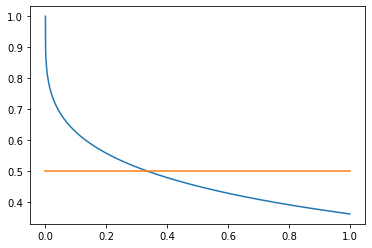

In [29]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 1, 0.0001)
x_1 = [0, 0.2, 0.4, 0.6, 0.8, 1]
y = 1 - (np.power(x, (1/4))/np.power((x+5), (1/4)))
z = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
plt.plot(x, y)
plt.plot(x_1, z)
plt.show()

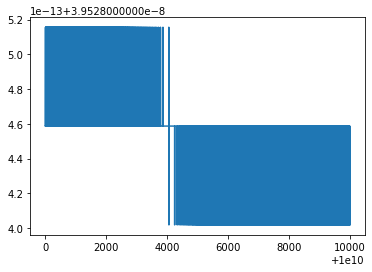

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10000000000, 10000010000, 1)
y = np.power((x+5), (1/4)) - np.power(x, (1/4))
plt.plot(x, y)
plt.show()

C:\Users\thoma\AppData\Local\Temp/ipykernel_28376/1842146471.py:4: RuntimeWarning: invalid value encountered in power
  y = (5 + np.power((np.power(x, 3)*x+5), (1/4)) - np.power((np.power((x+5), 3)*x), (1/4))) / np.power(np.power((x+5), 3), (1/4)) + np.power(np.power(x, 3), (1/4))


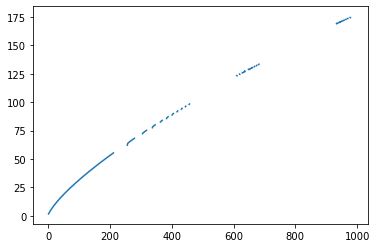

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 1000, 1)
y = (5 + np.power((np.power(x, 3)*x+5), (1/4)) - np.power((np.power((x+5), 3)*x), (1/4))) / np.power(np.power((x+5), 3), (1/4)) + np.power(np.power(x, 3), (1/4))
plt.plot(x, y)
plt.show()

# Problem 3

Let $k$ be a positive integer, and consider the quadratic

$$f(x) = x^2 - 2^kx + 1$$.

(a) When $k$ is large enough, if we compute the roots of this equation using the quadratic formula, using single precision arithmetic, the computer just says that 0 is a root of $f$- which it rather obviously is not.  Verify that this is so on the computer, and find the first $k$ for which this happens.

(b) Find a more precise way to compute $f$'s smallest root.

# A.)
See code below for the algorithm used.  
When k = 14, we begin running into extemely small roots for f(x), small enough to essentially resemble k = 0.

# B.)
Instead, we may rearrange the equation to become $2^kx = x^2 + 1$, which allows us to perform arithmetic without catastrophic cancellation. We can then plug in a value for k and solve for x as normal.

In [173]:
import numpy as np
for k in range(1, 20):
    proot = (-np.power(2, k) + np.power(np.power(2, 2*k) - 4, (1/2)))/2
    nroot = (-np.power(2, k) - np.power(np.power(2, 2*k) - 4, (1/2)))/2
    print("Root 1 for k = ", k, ":", proot)
    print("Root 2 for k = ", k, ":", nroot, "\n")

Root 1 for k =  1 : -1.0
Root 2 for k =  1 : -1.0 

Root 1 for k =  2 : -0.2679491924311228
Root 2 for k =  2 : -3.732050807568877 

Root 1 for k =  3 : -0.12701665379258298
Root 2 for k =  3 : -7.872983346207417 

Root 1 for k =  4 : -0.06274606680622785
Root 2 for k =  4 : -15.937253933193773 

Root 1 for k =  5 : -0.03128057732868861
Root 2 for k =  5 : -31.968719422671313 

Root 1 for k =  6 : -0.015628816561047643
Root 2 for k =  6 : -63.98437118343895 

Root 1 for k =  7 : -0.00781297689537297
Root 2 for k =  7 : -127.99218702310463 

Root 1 for k =  8 : -0.003906309606463765
Root 2 for k =  8 : -255.99609369039354 

Root 1 for k =  9 : -0.0019531324506374403
Root 2 for k =  9 : -511.99804686754936 

Root 1 for k =  10 : -0.0009765634313225746
Root 2 for k =  10 : -1023.9990234365687 

Root 1 for k =  11 : -0.0004882813664153218
Root 2 for k =  11 : -2047.9995117186336 

Root 1 for k =  12 : -0.00024414063955191523
Root 2 for k =  12 : -4095.9997558593604 

Root 1 for k =  13 : -

C:\Users\thoma\AppData\Local\Temp/ipykernel_2292/832561859.py:3: RuntimeWarning: invalid value encountered in power
  proot = (-np.power(2, k) + np.power(np.power(2, 2*k) - 4, (1/2)))/2
C:\Users\thoma\AppData\Local\Temp/ipykernel_2292/832561859.py:4: RuntimeWarning: invalid value encountered in power
  nroot = (-np.power(2, k) - np.power(np.power(2, 2*k) - 4, (1/2)))/2
